# Histogram of SMDs per ANC

To contribute to discussions about the ideal size of ANCs, make a chart of the current distribution. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import dataframe_image as dfi
from matplotlib import pyplot as plt

In [2]:
districts = pd.read_csv('../data/districts.csv')

In [3]:
anc_count = districts.groupby('anc_id').size()

In [4]:
stats = pd.DataFrame(anc_count.value_counts().sort_index(), columns=['N'])
stats['perc'] = stats['N'] / stats['N'].sum()
stats.loc[4] = 0
stats.loc[11] = 0
stats = stats.loc[stats.index.sort_values()]
stats

,N,perc
2,1,0.025
3,1,0.025
4,0,0.000
5,4,0.100
6,2,0.050
7,16,0.400
8,7,0.175
9,3,0.075
10,4,0.100
11,0,0.000


Text(0, 0.5, 'Count of ANCs')

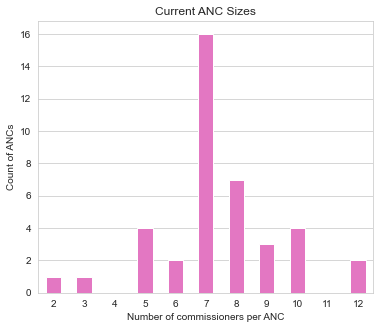

In [5]:
sns.set_style('whitegrid')
ax = stats['N'].plot(x=stats.index, kind='bar', figsize=(6,5), color=sns.color_palette()[6])
ax.xaxis.grid(alpha=0)
plt.xticks(rotation=0)
plt.title('Current ANC Sizes')
plt.xlabel('Number of commissioners per ANC')
plt.ylabel('Count of ANCs')
# plt.savefig('anc_histogram.png')

In [6]:
anc_count.min()

2

In [7]:
anc_count.median()

7.0

In [8]:
anc_count.max()

12

In [9]:
stats.N.sum()

40

## Breakout by Ward

Do different wards have odd numbers in their ANCs?

In [10]:
# Allocate the split 3/4G ANC entirely to Ward 4 for this analysis because 4 of the 7 SMDs are in Ward 4
districts_34g = districts.copy()
districts_34g.loc[districts_34g['smd_id'].isin(['smd_3G05', 'smd_3G06', 'smd_3G07']), 'ward'] = 4

In [11]:
ward_anc_count = districts_34g.groupby(['ward', 'anc_id']).size().reset_index(name='N')
ward_anc_count = ward_anc_count.rename(columns={'ward': 'Ward'})

In [12]:
pivot_ward_anc = pd.pivot_table(
    data=ward_anc_count
    , index='Ward'
    , columns='N'
    , aggfunc='size'
    , fill_value=0
)

pivot_ward_anc[4] = 0
pivot_ward_anc[11] = 0
pivot_ward_anc = pivot_ward_anc[pivot_ward_anc.columns.sort_values()]

# pivot_ward_anc['Total'] = pivot_ward_anc.sum(axis=1)
# pivot_ward_anc.loc['Total'] = pivot_ward_anc.sum(axis=0)

pivot_ward_anc_styled = pivot_ward_anc.style.background_gradient(
    cmap=sns.color_palette('light:#E377C1', as_cmap=True)
    , axis=None)

# dfi.export(pivot_ward_anc_styled, 'pivot_ward_anc.png')
pivot_ward_anc_styled

N,2,3,4,5,6,7,8,9,10,11,12
Ward,,,,,,,,,,,
1,0,0,0,1,0,0,1,0,0,0,2
2,1,1,0,0,0,0,3,1,0,0,0
3,0,0,0,2,0,1,0,1,1,0,0
4,0,0,0,0,1,1,1,1,1,0,0
5,0,0,0,1,0,2,1,0,1,0,0
6,0,0,0,0,1,2,1,0,1,0,0
7,0,0,0,0,0,5,0,0,0,0,0
8,0,0,0,0,0,5,0,0,0,0,0


In [13]:
anc_count[anc_count == 10]

anc_id
3D    10
4C    10
5E    10
6B    10
dtype: int64